In [1]:
import sys
sys.path.append('../../src/')

from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt
import math
from pathlib import Path
import dill as pickle

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
output_path = '../../data/'

In [4]:
def read_file(file_name, destination):
    with open(Path(destination) / file_name, 'rb') as in_strm:
        datastruct = pickle.load(in_strm)
        return datastruct

*Periodic traffic lights*

In [15]:
periodic_ew = PeriodicTrafficLight()
periodic_ew.initialize(period=30, time_delay=0)

periodic_ns = TrafficLightMirror()
periodic_ns.initialize(traffic_light=periodic_ew)

*Adaptive traffic lights*

In [17]:
adaptive1_ew = AdaptiveTrafficLight()
adaptive1_ew.initialize(sensor_depth=8, rule=1)

adaptive1_ns = TrafficLightMirror()
adaptive1_ns.initialize(traffic_light=adaptive1_ew)

In [5]:
adaptive2_ew = AdaptiveTrafficLight()
adaptive2_ew.initialize(sensor_depth=8, rule=2)

adaptive2_ns = TrafficLightMirror()
adaptive2_ns.initialize(traffic_light=adaptive2_ew)

*Single four-way intersection*

In [6]:
nonhom = lambda t: 0.2/2*math.cos(2*math.pi/43200*t)+0.2/2+0.05
hom = lambda t: 0.1
standard = [1.]
compound = [0.6,0.2,0.1,0.05,0.05]

In [7]:
standard_nonhom_network = Model1.IntersectionNetworkSimulator()
standard_nonhom_network.initialize(grid_dimensions=(1,1))
standard_nonhom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=nonhom, arrival_rate_e=nonhom, arrival_rate_s=nonhom, arrival_rate_w=nonhom, platoon_size_distribution=standard)
#standard_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
standard_nonhom_network.set_observable_intersections(grid_inds=[(0,0)])

In [8]:
standard_hom_network = Model1.IntersectionNetworkSimulator()
standard_hom_network.initialize(grid_dimensions=(1,1))
standard_hom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=hom, arrival_rate_e=hom, arrival_rate_s=hom, arrival_rate_w=hom, platoon_size_distribution=standard)
#standard_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
standard_hom_network.set_observable_intersections(grid_inds=[(0,0)])

In [9]:
compound_nonhom_network = Model1.IntersectionNetworkSimulator()
compound_nonhom_network.initialize(grid_dimensions=(1,1))
compound_nonhom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=nonhom, arrival_rate_e=nonhom, arrival_rate_s=nonhom, arrival_rate_w=nonhom, platoon_size_distribution=compound)
#compound_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
compound_nonhom_network.set_observable_intersections(grid_inds=[(0,0)])

In [10]:
compound_hom_network = Model1.IntersectionNetworkSimulator()
compound_hom_network.initialize(grid_dimensions=(1,1))
compound_hom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=hom, arrival_rate_e=hom, arrival_rate_s=hom, arrival_rate_w=hom, platoon_size_distribution=compound)
#compound_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
compound_hom_network.set_observable_intersections(grid_inds=[(0,0)])

*Evaluation*

In [25]:
evaluator = Evaluator()
standard_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=periodic_ns, traffic_light_ew=periodic_ew)
evaluator.initialize(network=standard_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_hom_periodic.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


In [26]:
evaluator = Evaluator()
standard_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive1_ns, traffic_light_ew=adaptive1_ew)
evaluator.initialize(network=standard_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_hom_adaptive1.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


In [ ]:
evaluator = Evaluator()
standard_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive2_ns, traffic_light_ew=adaptive2_ew)
evaluator.initialize(network=standard_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_hom_adaptive2.pkl', output_destination='../../data/evals/1x1')

In [28]:
evaluator = Evaluator()
standard_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=periodic_ns, traffic_light_ew=periodic_ew)
evaluator.initialize(network=standard_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_nonhom_periodic.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


NameError: name 'save_to_file' is not defined

In [31]:
evaluator = Evaluator()
standard_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive1_ns, traffic_light_ew=adaptive1_ew)
evaluator.initialize(network=standard_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_nonhom_adaptive1.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


In [32]:
evaluator = Evaluator()
standard_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive2_ns, traffic_light_ew=adaptive2_ew)
evaluator.initialize(network=standard_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='standard_nonhom_adaptive2.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


In [ ]:
evaluator = Evaluator()
compound_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=periodic_ns, traffic_light_ew=periodic_ew)
evaluator.initialize(network=compound_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_hom_periodic.pkl', output_destination='../../data/evals/1x1')

In [ ]:
evaluator = Evaluator()
compound_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive1_ns, traffic_light_ew=adaptive1_ew)
evaluator.initialize(network=compound_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_hom_adaptive1.pkl', output_destination='../../data/evals/1x1')

In [ ]:
evaluator = Evaluator()
compound_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive2_ns, traffic_light_ew=adaptive2_ew)
evaluator.initialize(network=compound_hom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_hom_adaptive2.pkl', output_destination='../../data/evals/1x1')

In [21]:
evaluator = Evaluator()
compound_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=periodic_ns, traffic_light_ew=periodic_ew)
evaluator.initialize(network=compound_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_nonhom_periodic.pkl', output_destination='../../data/evals/1x1')

Finished 10 trials.


FileExistsError: [Errno 17] File exists: '../../data/evals/1x1/compound_nonhom_periodic.pkl'

In [ ]:
evaluator = Evaluator()
compound_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive1_ns, traffic_light_ew=adaptive1_ew)
evaluator.initialize(network=compound_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_nonhom_adaptive1.pkl', output_destination='../../data/evals/1x1')

In [ ]:
evaluator = Evaluator()
compound_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive2_ns, traffic_light_ew=adaptive2_ew)
evaluator.initialize(network=compound_nonhom_network)
output = evaluator.simulate(num_trials=10, end_time=43200, delta_t=0.1)
average = evaluator.compute_average()

evaluator.save_to_file(file_name='compound_nonhom_adaptive2.pkl', output_destination='../../data/evals/1x1')

Compare the traffic lights for each queuing model

In [5]:
evaluators = []
evaluator = read_file(file_name="standard_hom_periodic.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="standard_hom_adaptive1.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="standard_hom_adaptive2.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]

In [6]:
evaluators = []
evaluator = read_file(file_name="standard_nonhom_periodic.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="standard_nonhom_adaptive1.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="standard_nonhom_adaptive2.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]

In [5]:
evaluators = []
evaluator = read_file(file_name="compound_nonhom_periodic.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="compound_nonhom_adaptive1.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="compound_nonhom_adaptive2.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]

In [5]:
evaluators = []
evaluator = read_file(file_name="compound_hom_periodic.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="compound_hom_adaptive1.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]
evaluator = read_file(file_name="compound_hom_adaptive2.pkl", destination="../../data/evals/1x1")
evaluators += [evaluator]

In [6]:
multi_eval = MultiEvaluator()
multi_eval.initialize(evaluators=evaluators, labels=["$A_3$", "$B_3$", "$C_3$"], variable="Scenario")

In [10]:
save_to_file(multi_eval, file_name="queuing_model.pkl", output_destination="../../data/evals/multi")

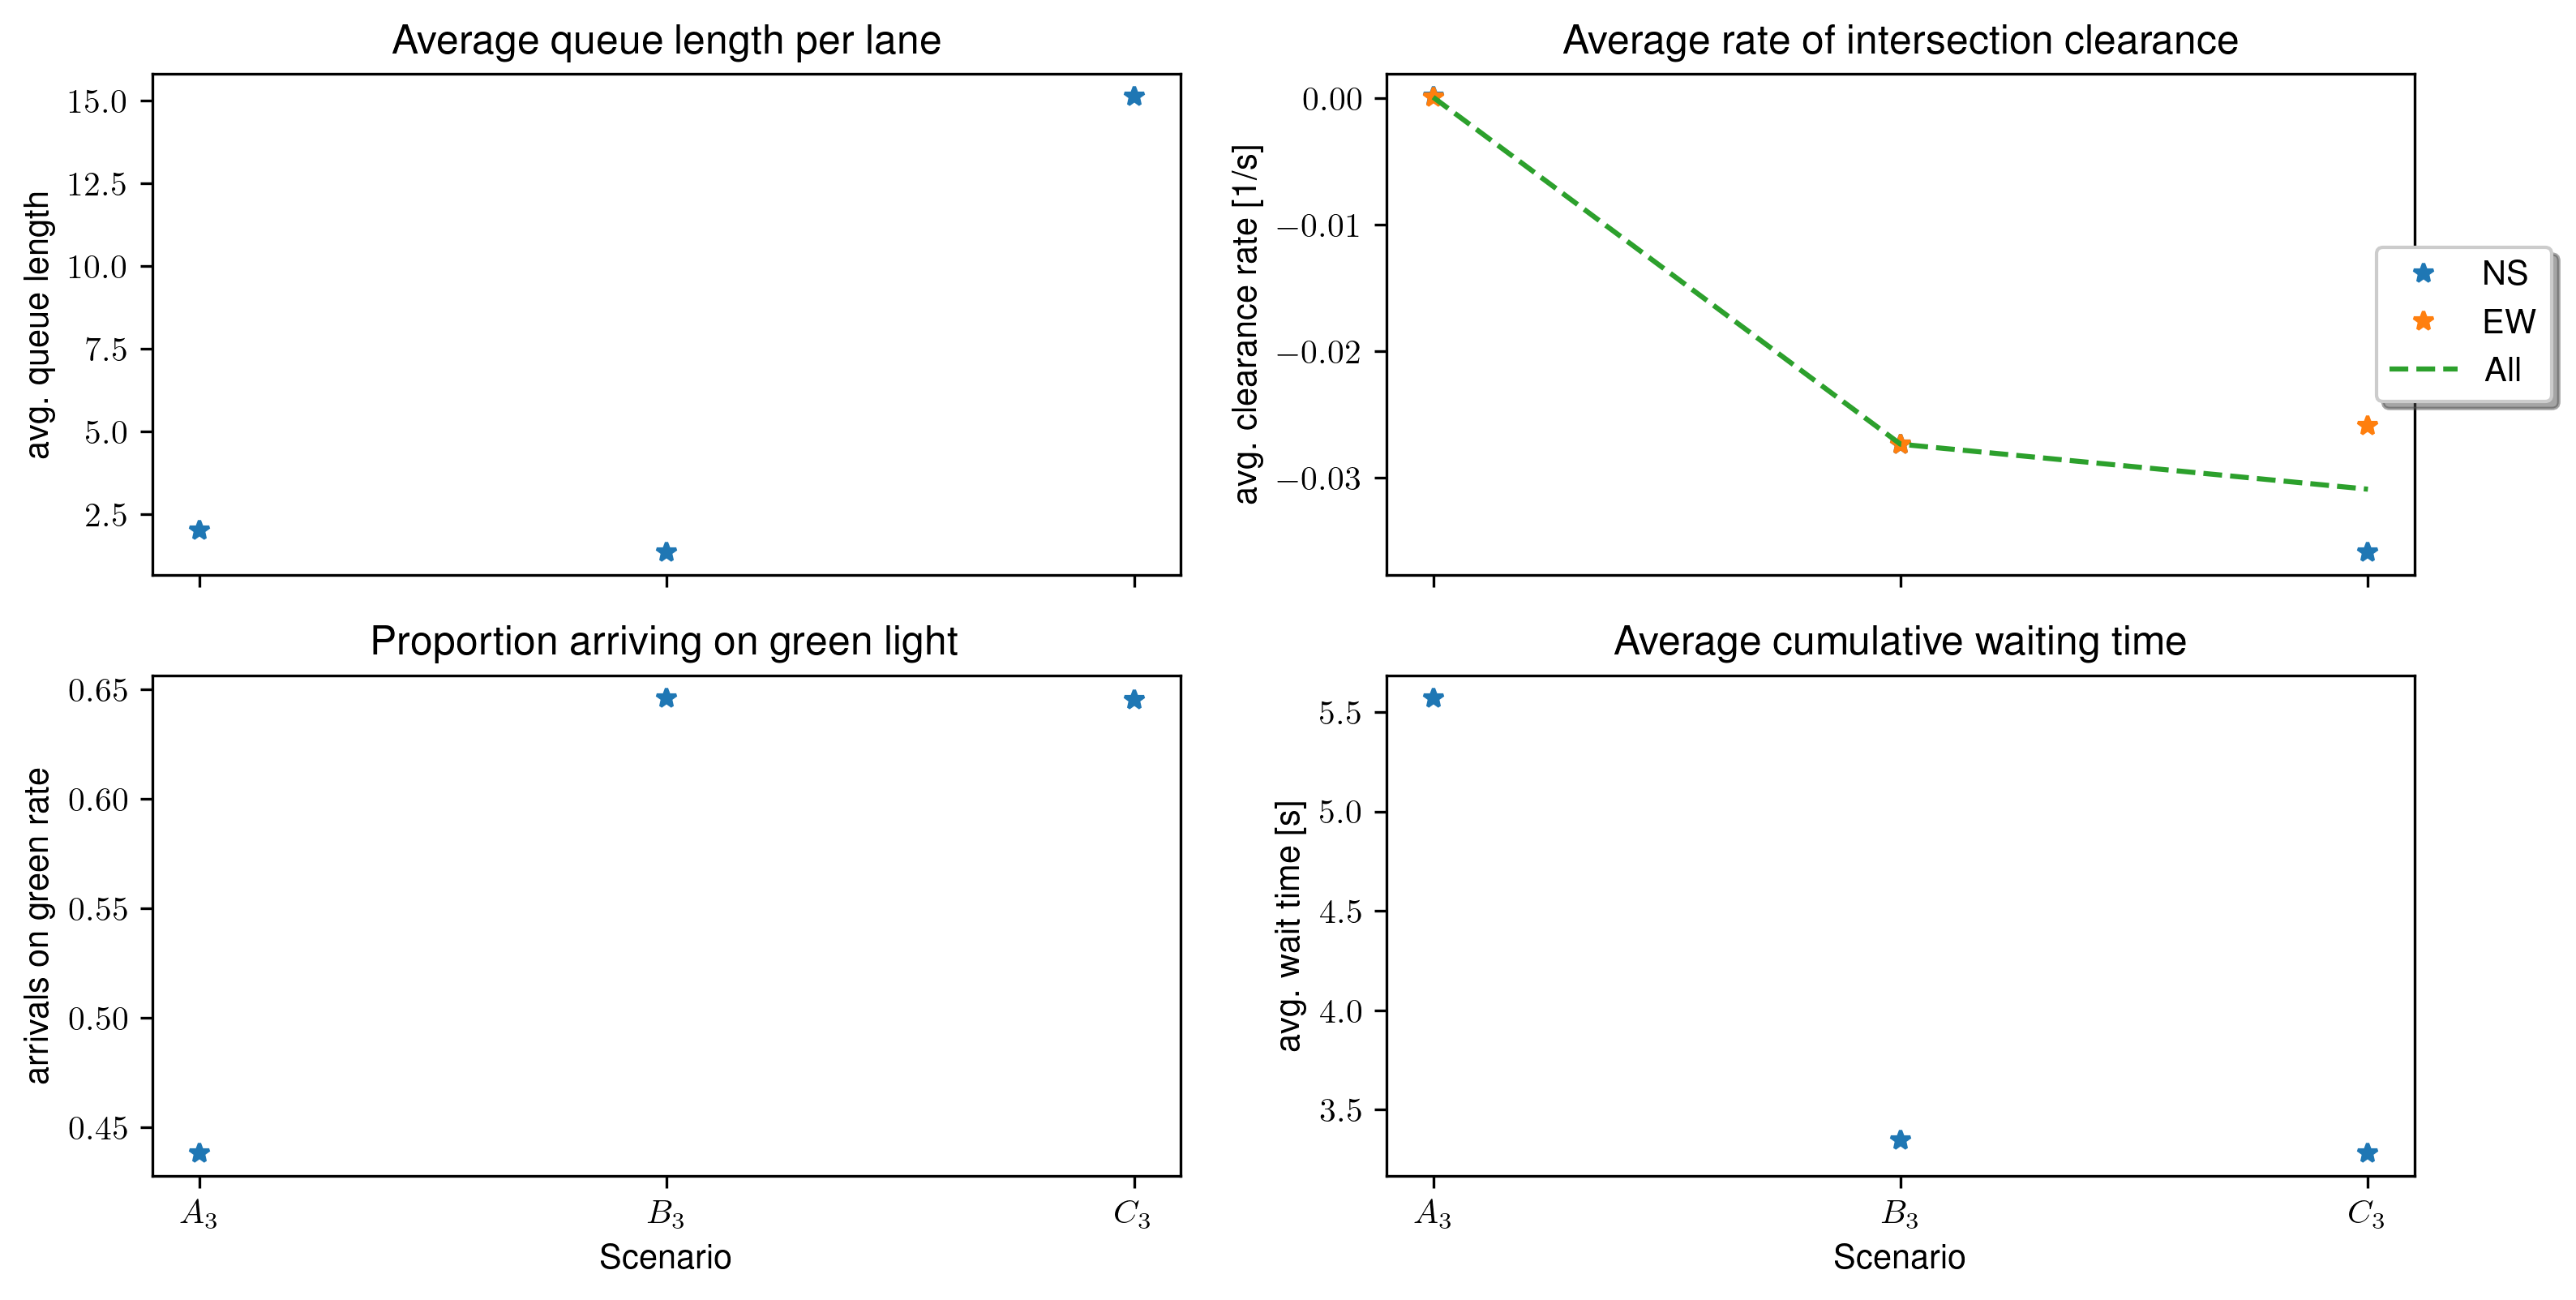

In [8]:
fig,axs = multi_eval.plot_intersection_averages(plt=plt, grid_ind=(0,0), fig_size=(12,6), plot_tot_switches=False)
plt.savefig(output_path+'figs/compound_nonhom_avgs', bbox_inches='tight')

In [ ]:
fig,axs = multi_eval.plot_queue_averages(plt=plt, grid_ind=(0,0), fig_size=(4,5))
plt.savefig(output_path+'figs/queue_avgs', bbox_inches='tight')

In [ ]:
fig,axs = multi_eval.plot_avg_wait_times(plt=plt, fig_size=(7,2))
plt.savefig(output_path+'figs/wait_times', bbox_inches='tight')

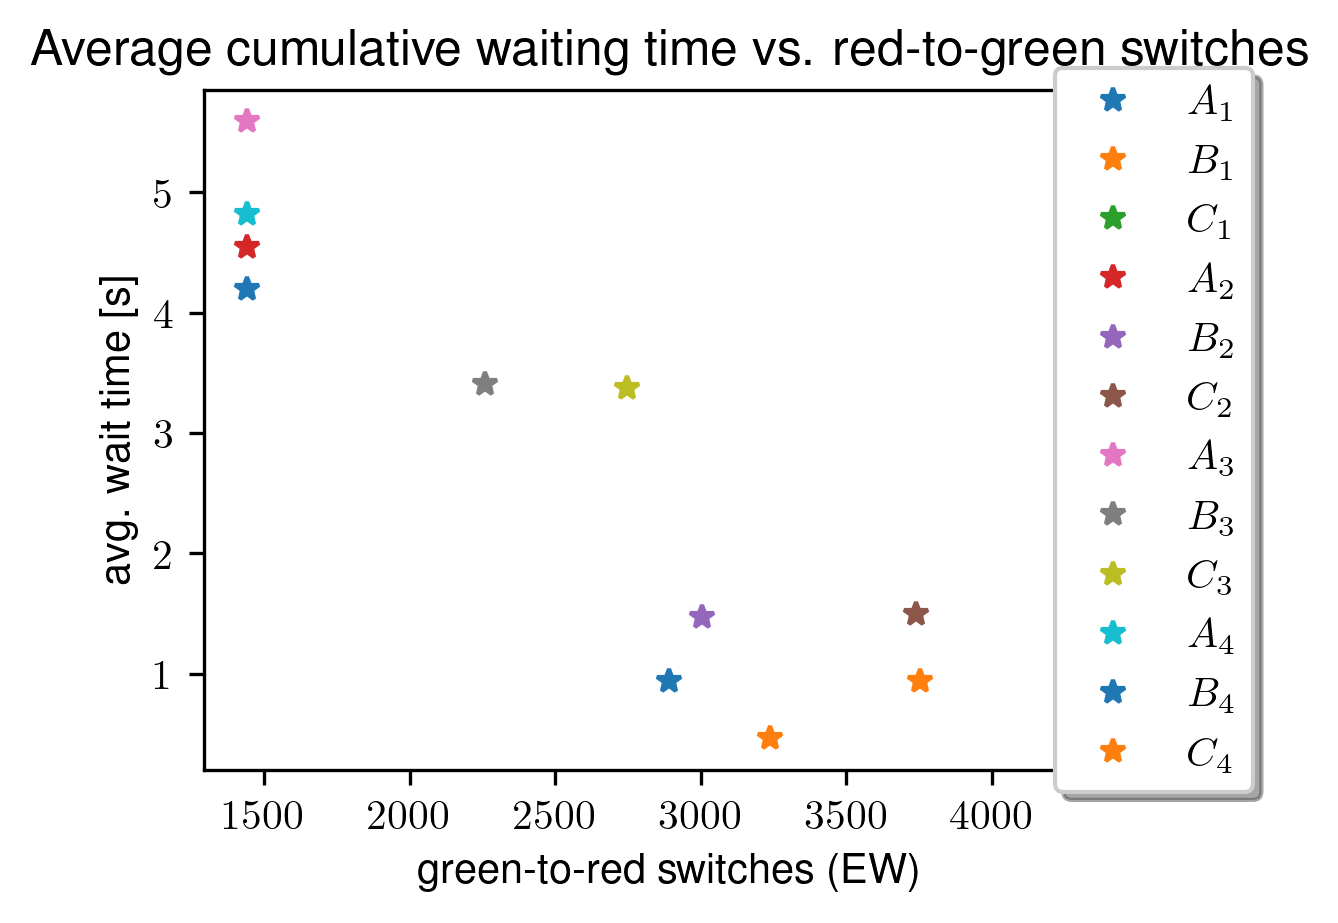

In [13]:
fig,ax = multi_eval.compare_metrics(plt=plt, x_axis="tot_switches_ew", y_axis="avg_wait_time", grid_ind=(0,0), fig_size=(4,3))
ax.set(xlabel="green-to-red switches (EW)", ylabel="avg. wait time [s]")
ax.set_title("Average cumulative waiting time vs. red-to-green switches")
plt.savefig(output_path+'figs/payoff', bbox_inches='tight')

In [10]:
base = '$A_3$'
scen = '$B_3$'

x1_b = '{:1.3f}'.format(multi_eval.evaluators[base].average[(0,0)]['avg_wait_time'])
x2_b = '{:1.3f}'.format(multi_eval.evaluators[base].average[(0,0)]['avg_queue_length'])
y1_b = '{:1.6f}'.format(multi_eval.evaluators[base].average[(0,0)]['avg_clearance_rate_ew'])
y2_b = '{:1.6f}'.format(multi_eval.evaluators[base].average[(0,0)]['avg_clearance_rate_ns'])

x1 = '{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_wait_time'])
x2 = '{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_queue_length'])
y1 = '{:1.6f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_clearance_rate_ew'])
y2 = '{:1.6f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_clearance_rate_ns'])
#y2 = '{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['arrivals_on_green_rate']))

print(x1, "&", x2, "&",  '{:1.1%}'.format((float(x1)-float(x1_b))/float(x1_b)), "&", '{:1.1%}'.format((float(x2)-float(x2_b))/float(x2_b)))
print(y1, "1/s", "&", y2, "1/s")

1.479 & 0.313 & -67.5% & -61.5%
-0.024580 1/s & -0.024596 1/s
